# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousedatacomplete=pd.merge(mouse_metadata,study_results, on= "Mouse ID")
# Display the data table for preview

#mousedatacomplete["Mouse ID"].value_counts()
mousedatacomplete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
Mouse_Count= len(mousedatacomplete["Mouse ID"].value_counts())
Mouse_Count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = mousedatacomplete[mousedatacomplete.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRows = mousedatacomplete[mousedatacomplete.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_index=duplicateRows.index
duplicate_index_list = duplicate_index.tolist()
duplicate_index_list


[909, 911, 913, 915, 917]

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_index=duplicateRows.index
duplicate_index_list = duplicate_index.tolist()

cleanmousedatacomplete = mousedatacomplete.loc[(mousedatacomplete["Mouse ID"]!="g989"),:]
cleanmousedatacomplete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice in the clean DataFrame.
Mouse_Count= len(cleanmousedatacomplete["Mouse ID"].value_counts())
#Mouse_Count
cleanmousedatacomplete.head(45)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary Statistics

In [7]:
meantumorgroup=cleanmousedatacomplete.groupby(["Drug Regimen"])
meantumor = meantumorgroup[["Tumor Volume (mm3)"]].mean()

mediantumorgroup=cleanmousedatacomplete.groupby(["Drug Regimen"])
mediantumor = mediantumorgroup[["Tumor Volume (mm3)"]].median()

vartumorgroup=cleanmousedatacomplete.groupby(["Drug Regimen"])
vartumor = vartumorgroup[["Tumor Volume (mm3)"]].var()

stdumorgroup=cleanmousedatacomplete.groupby(["Drug Regimen"])
stdtumor = stdumorgroup[["Tumor Volume (mm3)"]].std()

semtumorgroup=cleanmousedatacomplete.groupby(["Drug Regimen"])
semtumor = semtumorgroup[["Tumor Volume (mm3)"]].sem()
semtumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugdatasummary = pd.DataFrame({"Mean Tumor Volume":meantumor["Tumor Volume (mm3)"],
                               "Median Tumor Volume":mediantumor["Tumor Volume (mm3)"],
                               "Tumor Volume Variance":vartumor["Tumor Volume (mm3)"],
                               "Tumor Volume Std. Dev.":stdtumor["Tumor Volume (mm3)"],
                               "Tumor Volume Std. Err.":semtumor["Tumor Volume (mm3)"]})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drugdatasummary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
meantumorgroup["Tumor Volume (mm3)"].aggregate(['mean', 'median',"var","std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

In [11]:
drugsandtime =cleanmousedatacomplete.groupby(["Drug Regimen"])
data =drugsandtime[["Timepoint"]].count().sort_values("Timepoint")
data=data.reset_index()

data

,Drug Regimen,Timepoint
0,Propriva,148
1,Ceftamin,178
2,Infubinol,178
3,Placebo,181
4,Stelasyn,181
5,Zoniferol,182
6,Naftisol,186
7,Ketapril,188
8,Ramicane,228
9,Capomulin,230


<Axes: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

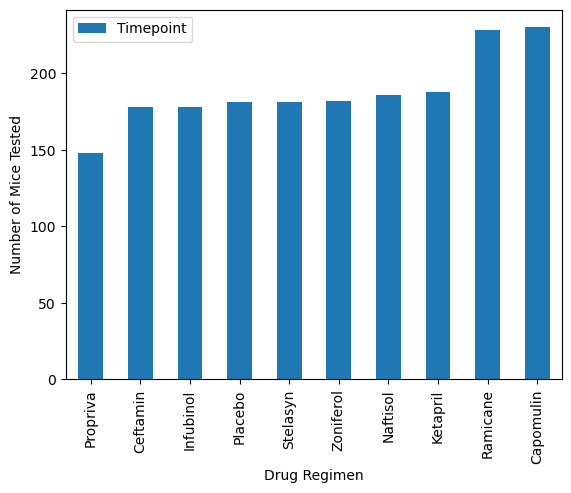

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

data.plot.bar(x="Drug Regimen",y="Timepoint",ylabel = "Number of Mice Tested")

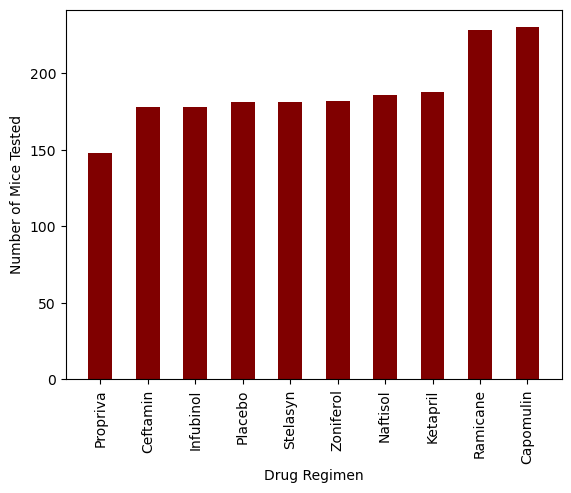

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

datax = data["Drug Regimen"]
datay = data["Timepoint"]
plt.bar(datax, datay,color = 'maroon',width = 0.5)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()


In [14]:
gendergroup=cleanmousedatacomplete.groupby(["Sex"])
gender=gendergroup[["Mouse ID"]].count()
sex = ["Female","Male"]
gender

,Mouse ID
Sex,
Female,922
Male,958


<Axes: ylabel='Mouse ID'>

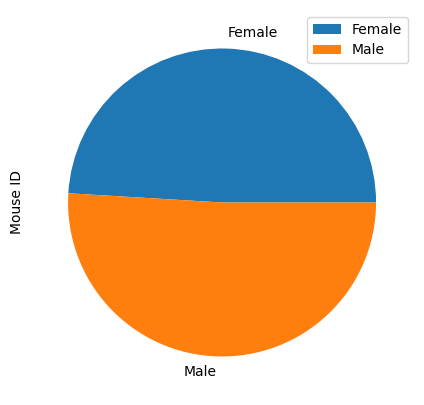

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

genderpieplot = gender.plot.pie(y="Mouse ID", figsize = (5,5))
genderpieplot

In [16]:
gendergroup=cleanmousedatacomplete.groupby(["Sex"])
gender=gendergroup[["Mouse ID"]].count()
sex = ["Female","Male"]
gender

,Mouse ID
Sex,
Female,922
Male,958


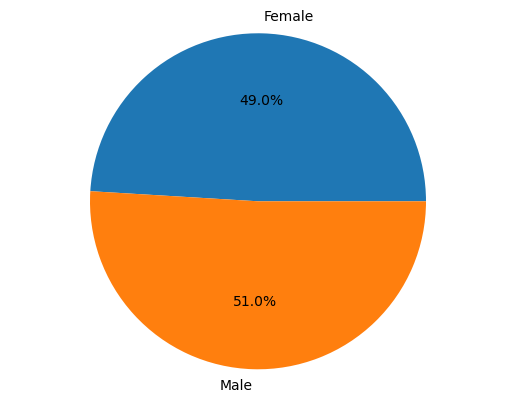

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender["Mouse ID"], labels = sex, autopct = "%0.1f%%")
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list =["Capomulin","Ramicane","Infubinol","Ceftamin"]
drugfiltered = cleanmousedatacomplete[cleanmousedatacomplete["Drug Regimen"].isin(drug_list)]

# Start by getting the last (greatest) timepoint for each mouse
finaltumorsize =drugfiltered[drugfiltered["Timepoint"]== 45]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#mousetumor
Compressedfinaltumorsize=finaltumorsize[["Drug Regimen","Tumor Volume (mm3)"]]

In [73]:
# Put treatments into a list for for loop (and later for plot labels)
    
Ramicane=Compressedfinaltumorsize[Compressedfinaltumorsize["Drug Regimen"] == "Ramicane"]
Capomulin=Compressedfinaltumorsize[Compressedfinaltumorsize["Drug Regimen"] == "Capomulin"]
Ceftamin=Compressedfinaltumorsize[Compressedfinaltumorsize["Drug Regimen"] == "Ceftamin"]
Infubinol=Compressedfinaltumorsize[Compressedfinaltumorsize["Drug Regimen"] == "Infubinol"]
# Create empty list to fill with tumor vol data (for plotting)
tumorvolumefinaldata =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

Q1Ramicane,Q3Ramicane = np.percentile(Ramicane["Tumor Volume (mm3)"], [75 ,25])
Q1Capomulin,Q3Capomulin = np.percentile(Capomulin["Tumor Volume (mm3)"], [75 ,25])
Q1Ceftamin,Q3Ceftamin = np.percentile(Ceftamin["Tumor Volume (mm3)"], [75 ,25])
Q1Infubinol,Q3Infubinol = np.percentile(Infubinol["Tumor Volume (mm3)"], [75 ,25])
#IQR _Capomulin
#IQR_Ceftamin
#IRQ_Infubinol

IQR_Ramicane =Q1Ramicane-Q3Ramicane
IQR_Capomulin = Q1Capomulin-Q3Capomulin
IQR_Ceftamin= Q1Ceftamin-Q3Ceftamin
IQR_Infubinol =Q1Infubinol-Q3Infubinol
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
Ramicanelower_bound = Q1Ramicane - (1.5*IQR_Ramicane)
Ramicaneupper_bound = Q3Ramicane + (1.5*IQR_Ramicane)

Capomulinlower_bound = Q1Capomulin - (1.5*IQR_Capomulin)
Capomulinupper_bound = Q3Capomulin + (1.5*IQR_Capomulin)

Ceftaminlower_bound = Q1Ceftamin - (1.5*IQR_Ceftamin)
Ceftaminupper_bound = Q3Ceftamin + (1.5*IQR_Ceftamin)

Infubinollower_bound = Q1Infubinol - (1.5*IQR_Infubinol)
Infubinolupper_bound = Q3Infubinol + (1.5*IQR_Infubinol)

Ramicane_Outliers = Ramicane.loc[(Ramicane["Tumor Volume (mm3)"]> Ramicaneupper_bound)|(Ramicane["Tumor Volume (mm3)"]<Ramicanelower_bound),:]

Capomulin_Outliers = Capomulin.loc[(Capomulin["Tumor Volume (mm3)"]> Capomulinupper_bound)|(Capomulin["Tumor Volume (mm3)"]<Capomulinlower_bound),:]

Ceftamin_Outliers = Ceftamin.loc[(Ceftamin["Tumor Volume (mm3)"]> Ceftaminupper_bound)|(Ceftamin["Tumor Volume (mm3)"]<Ceftaminlower_bound),:]

Infubinol_Outliers = Infubinol.loc[(Infubinol["Tumor Volume (mm3)"]> Infubinolupper_bound)|(Infubinol["Tumor Volume (mm3)"]<Infubinollower_bound),:]



<Axes: ylabel='Final Tumor Volume'>

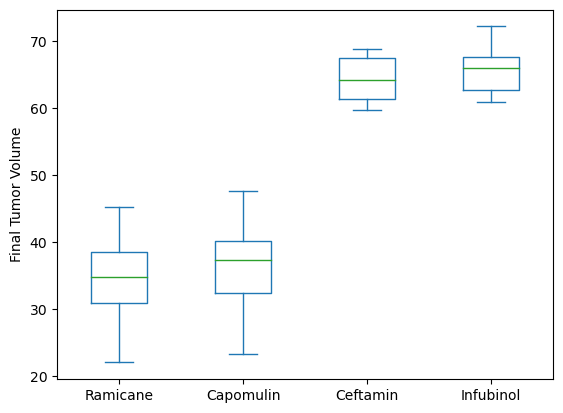

In [67]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Ramicane=Compressedfinaltumorsize[Compressedfinaltumorsize["Drug Regimen"] == "Ramicane"]
Capomulin=Compressedfinaltumorsize[Compressedfinaltumorsize["Drug Regimen"] == "Capomulin"]
Ceftamin=Compressedfinaltumorsize[Compressedfinaltumorsize["Drug Regimen"] == "Ceftamin"]
Infubinol=Compressedfinaltumorsize[Compressedfinaltumorsize["Drug Regimen"] == "Infubinol"]

Ramicane=Ramicane.pivot(columns='Drug Regimen', values='Tumor Volume (mm3)')
Capomulin=Capomulin.pivot(columns='Drug Regimen', values='Tumor Volume (mm3)')
Ceftamin=Ceftamin.pivot(columns='Drug Regimen', values='Tumor Volume (mm3)')
Infubinol=Infubinol.pivot(columns='Drug Regimen', values='Tumor Volume (mm3)')
Tumor_Data_Treatments = pd.DataFrame({"Ramicane":Ramicane["Ramicane"],
                                     "Capomulin":Capomulin["Capomulin"],
                                     "Ceftamin":Ceftamin["Ceftamin"],
                                     "Infubinol":Infubinol["Infubinol"]})

Tumor_Data_Treatments.plot(ylabel="Final Tumor Volume",kind = "box")

## Line and Scatter Plots

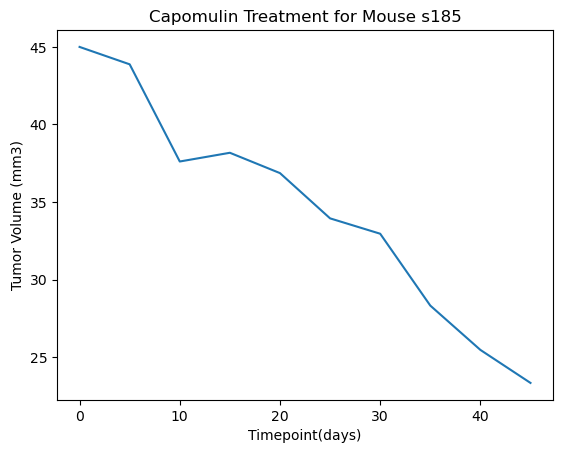

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

s185data= cleanmousedatacomplete[(cleanmousedatacomplete["Drug Regimen"] == "Capomulin")& (cleanmousedatacomplete["Mouse ID"] == "s185")]


x = s185data["Timepoint"]
y = s185data['Tumor Volume (mm3)']
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for Mouse s185')
plt.plot(x,y)
plt.show()

In [31]:
CapomulinWeighttumorsize

,Drug Regimen,Tumor Volume (mm3),Weight (g),Mouse ID
19,Capomulin,23.343598,17,s185
29,Capomulin,28.484033,15,x401
39,Capomulin,28.430964,17,m601
104,Capomulin,31.023923,17,u364
124,Capomulin,31.896238,17,y793
134,Capomulin,32.377357,17,r554
144,Capomulin,33.329098,19,m957
164,Capomulin,34.455298,17,t565
204,Capomulin,37.311846,20,i738
224,Capomulin,36.041047,21,w914


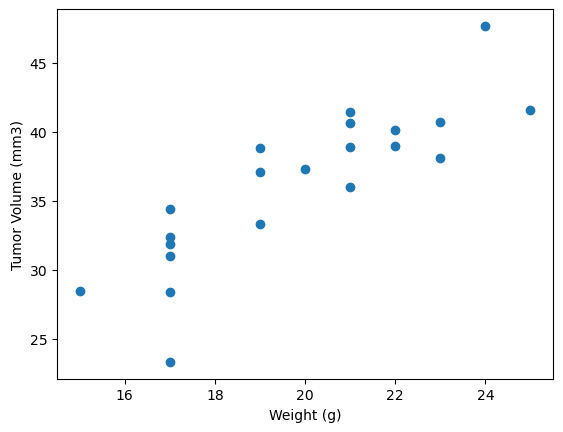

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


Weighttumorsize=finaltumorsize[["Drug Regimen","Tumor Volume (mm3)",'Weight (g)','Mouse ID']]
CapomulinWeighttumorsize = Weighttumorsize[(Weighttumorsize["Drug Regimen"])=="Capomulin"]
weightgroupby =CapomulinWeighttumorsize.groupby(["Mouse ID"])
Capomulin_tumor =weightgroupby[["Tumor Volume (mm3)","Weight (g)"]].mean()
Capomulin_tumor.reset_index()

y=Capomulin_tumor["Tumor Volume (mm3)"]
x=Capomulin_tumor["Weight (g)"]


plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(x,y)
plt.show()


,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,38.982878,22.0
b742,38.939633,21.0
g288,37.074024,19.0
g316,40.159220,22.0
i557,47.685963,24.0
i738,37.311846,20.0
j119,38.125164,23.0
l509,41.483008,21.0
l897,38.846876,19.0


## Correlation and Regression

The correlation between Weigh and Tumor Size is 0.85


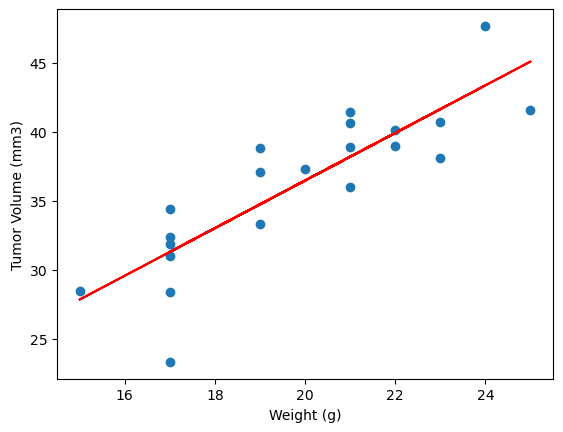

In [43]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(y,x)

print(f"The correlation between Weigh and Tumor Size is {round(correlation[0],2)}")
# for mouse weight and average tumor volume for the Capomulin regimen
Weighttumorsize=finaltumorsize[["Drug Regimen","Tumor Volume (mm3)",'Weight (g)','Mouse ID']]
CapomulinWeighttumorsize = Weighttumorsize[(Weighttumorsize["Drug Regimen"])=="Capomulin"]
weightgroupby =CapomulinWeighttumorsize.groupby(["Mouse ID"])
Capomulin_tumor =weightgroupby[["Tumor Volume (mm3)","Weight (g)"]].mean()
Capomulin_tumor.reset_index()

y=Capomulin_tumor["Tumor Volume (mm3)"]
x=Capomulin_tumor["Weight (g)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.show()

